In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.datasets import load_iris

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn import metrics

In [5]:
iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
from sklearn.svm import SVC

In [9]:
model = SVC()

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [11]:
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
predicted = model.predict(X_test)

expected = Y_test

In [14]:
print(metrics.accuracy_score(expected,predicted))

0.8947368421052632


In [15]:
from sklearn import svm

In [16]:
X = iris.data[:,:2]

Y = iris.target

In [17]:
C = 1.0

In [18]:
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [19]:
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [20]:
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [21]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
h = 0.02

x_min = X[:,0].min() -1

x_max = X[:,0].max() +1

In [34]:
y_min = X[:,1].min() -1
y_max = X[:,1].max() +1

In [35]:
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [36]:
xx.shape

(220, 280)

In [37]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: linewidths is ignored by contourf
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: linewidths is ignored by contourf
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: linewidths is ignored by contourf
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: linewidths is ignored by contourf
  del sys.path[0]


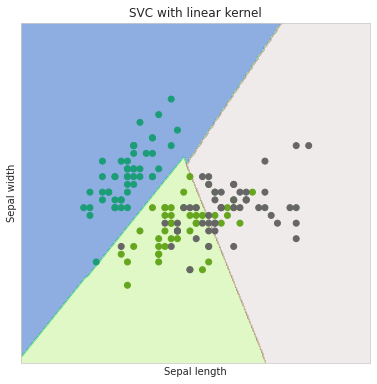

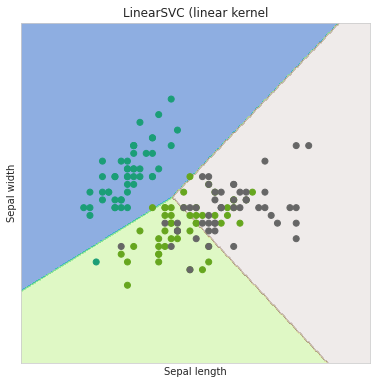

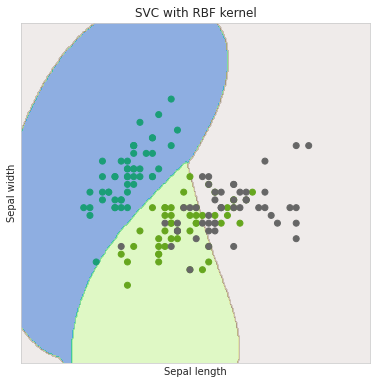

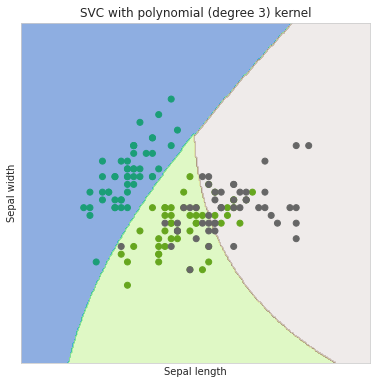

In [41]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):

  plt.figure(figsize=(15,15))

  plt.subplot(2,2,i+1)

  plt.subplots_adjust(wspace=0.4,hspace=0.4)

  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

  Z = Z.reshape(xx.shape)

  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)

  plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)

  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])